### Regression Analysis

In [1]:
# Warning for handling warning messages
import warnings
warnings.filterwarnings(action='ignore')
# https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython

In [2]:
# Numpy for data management
import numpy as np

# Pandas also for data management
import pandas as pd

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns
sns.set_style("darkgrid")

# Stats modules
import statsmodels.api as sm
import scipy.stats as stats

# Auxiliar libraries
from sklearn.metrics import r2_score

## a) Select two features in your dataset with more or less “linear‐like” scatterplot. Display the scatter‐plot, and make a comment on it

In [33]:
# Defining the col_names
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX' ,'PTRATIO', 'B' , 'LSTAT' , 'MEDV']

# Read the CSV file with new column names
data = pd.read_csv('housing.csv', header=0, delim_whitespace=True, names=col_names)

# Print the first few rows of the data frame
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


[Text(0.5, 0, 'TAX'), Text(0, 0.5, 'MEDV')]

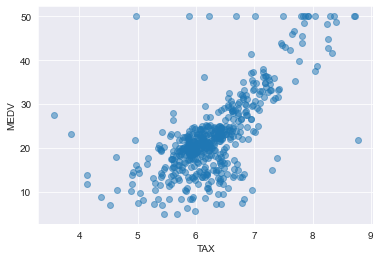

In [40]:
# Extract the required columns
x = data['RM']
y = data['MEDV']

# Plot the scatter plot
ax = sns.regplot(x=x, y=y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='TAX', ylabel='MEDV')

# ADD COMMENT HERE

## b) Build a linear regression of one of the features over the other. Obtain a normal probability plot of the standardized residuals from this regression. Does the normal probability plot indicate acceptable normality, or is there any skewness? If a skewness, what is the type of it?


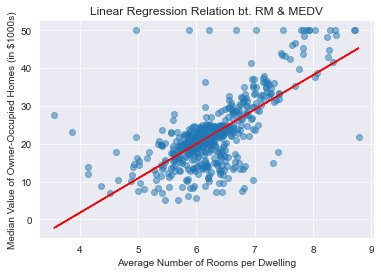

In [42]:
# calculate the coefficients of the linear regression using numpy's polyfit function
beta = np.polyfit(x, y, deg=1)

# make predictions using the linear regression
predictions = x * beta[0] + beta[1]

# create a scatter plot of the data and overlay a line plot of the linear regression
ax = sns.regplot(x=x, y=y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='Average Number of Rooms per Dwelling', 
       ylabel='Median Value of Owner-Occupied Homes (in $1000s)',
       title='Linear Regression Relation bt. RM & MEDV')
plt.plot(x, predictions, color='red')

# show the plot
plt.show()


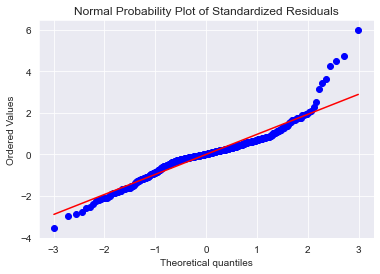

In [43]:
# calculate the standardized residuals from the linear regression
residuals = y - predictions
standardized_residuals = stats.zscore(residuals)

# create a normal probability plot of the standardized residuals
stats.probplot(standardized_residuals, plot=plt)
plt.title('Normal Probability Plot of Standardized Residuals')

# show the plot
plt.show()


## ADD COMMENT HERE

## Take the natural log of both of the variables and perform a linear regression on the transformed features. Obtain a normal probability plot of the standardized residuals from this regression. Discuss if this probability plot indicates an acceptable level of normality?